In [211]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path
from scipy.stats import linregress
from datetime import datetime
import matplotlib.dates as mdates


file = Path("data/US_Covid_data.csv")
file_df = pd.read_csv(file)
file_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN


In [212]:
#need to make region lists for pulling data.  Some regions are seperate cities

West = ['WA','OR','CA','NV','ID','MT','WY','UT','CO','AZ','NM']
Mid_West = ['ND', 'SD','NE', 'KS','MN','IA','MO','WI','IL','MI','OH']
North_East = ['ME','NH','VT', 'MA','CT','RMI','NY','PA','NJ']
South = ['TX','OK','AR','LA','MS','TN','KY','AL','FL','GA','SC','NC','VA','DC', 'MD', 'DE']

file_df["Region"] = file_df['state'].apply(lambda x:"West" if x in West else
                                               ('Mid_West' if x in Mid_West else
                                               ('North_East' if x in North_East else
                                               ('South' if x in South else np.nan))))

file_df




,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,Region
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN,Mid_West
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree,Mid_West
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree,South
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60055,02/09/2021,TX,2504556,NaN,NaN,13329,2676.0,43306,NaN,NaN,207,0.0,02/11/2021 12:00:00 AM,Not agree,Not agree,South
60056,11/20/2020,FL,913561,NaN,NaN,8217,1677.0,19014,NaN,NaN,79,5.0,11/20/2020 12:00:00 AM,Not agree,Not agree,South
60057,08/17/2020,NM,23500,NaN,NaN,92,0.0,682,NaN,NaN,4,0.0,08/19/2020 12:00:00 AM,NaN,Not agree,West
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0,06/19/2020 12:00:00 AM,Agree,Agree,South


In [213]:
#sort by month - needs to be in the same way the data is presented 
file_df['submission_date'] = pd.to_datetime(file_df['submission_date'])

file_df['Year'] = file_df['submission_date'].dt.year
file_df['Month'] = file_df['submission_date'].dt.month

file_df['yyyy-mm'] = file_df['submission_date'].dt.strftime('%Y-%m')

file_df.head()


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,Region,Year,Month,yyyy-mm
0,2021-03-11,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN,Mid_West,2021,3,2021-03
1,2021-12-01,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree,Mid_West,2021,12,2021-12
2,2022-01-02,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN,NaN,2022,1,2022-01
3,2021-11-22,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree,South,2021,11,2021-11
4,2022-05-30,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN,NaN,2022,5,2022-05


In [214]:
arizona = file_df.loc[(file_df["state"] == "AZ")]

arizona.head()


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,Region,Year,Month,yyyy-mm
15531,2021-09-12,AZ,1048600,963051.0,85549.0,2765,330.0,19187,17095.0,2092.0,4,2.0,09/13/2021 02:26:59 PM,Agree,Agree,West,2021,9,2021-09
15544,2020-02-13,AZ,1,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree,West,2020,2,2020-02
15597,2022-05-04,AZ,2025435,1790176.0,235259.0,3911,614.0,30189,26236.0,3953.0,238,41.0,05/05/2022 01:33:26 PM,Agree,Agree,West,2022,5,2022-05
15598,2021-01-26,AZ,733073,688186.0,44887.0,4751,308.0,12448,11117.0,1331.0,209,34.0,01/27/2021 02:53:24 PM,Agree,Agree,West,2021,1,2021-01
15616,2021-04-05,AZ,845535,785485.0,60050.0,608,70.0,16990,15063.0,1927.0,0,0.0,04/06/2021 01:43:58 PM,Agree,Agree,West,2021,4,2021-04


In [215]:
#list columns
arizona.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths', 'Region', 'Year', 'Month', 'yyyy-mm'],
      dtype='object')

In [216]:
#rename column
arizona = arizona.rename(columns={"submission_date":"Date","new_case":"New Case","conf_cases":"Confirmed Cases"}) 

arizona.head()

,Date,state,tot_cases,Confirmed Cases,prob_cases,New Case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,Region,Year,Month,yyyy-mm
15531,2021-09-12,AZ,1048600,963051.0,85549.0,2765,330.0,19187,17095.0,2092.0,4,2.0,09/13/2021 02:26:59 PM,Agree,Agree,West,2021,9,2021-09
15544,2020-02-13,AZ,1,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree,West,2020,2,2020-02
15597,2022-05-04,AZ,2025435,1790176.0,235259.0,3911,614.0,30189,26236.0,3953.0,238,41.0,05/05/2022 01:33:26 PM,Agree,Agree,West,2022,5,2022-05
15598,2021-01-26,AZ,733073,688186.0,44887.0,4751,308.0,12448,11117.0,1331.0,209,34.0,01/27/2021 02:53:24 PM,Agree,Agree,West,2021,1,2021-01
15616,2021-04-05,AZ,845535,785485.0,60050.0,608,70.0,16990,15063.0,1927.0,0,0.0,04/06/2021 01:43:58 PM,Agree,Agree,West,2021,4,2021-04


In [234]:
arizona_reduced = arizona[["Date","New Case","yyyy-mm"]]
arizona_reduced.head (20)

,Date,New Case,yyyy-mm
15531,2021-09-12,2765,2021-09
15544,2020-02-13,0,2020-02
15597,2022-05-04,3911,2022-05
15598,2021-01-26,4751,2021-01
15616,2021-04-05,608,2021-04
15623,2021-11-23,3057,2021-11
15636,2022-02-28,0,2022-02
15651,2021-04-03,706,2021-04
15669,2021-05-29,557,2021-05
15671,2022-06-13,0,2022-06


In [235]:
arizona2 = arizona_reduced.sort_values(["Date"], ascending=True)

arizona2

,Date,New Case,yyyy-mm
44420,2020-01-22,0,2020-01
22107,2020-01-23,0,2020-01
16997,2020-01-24,0,2020-01
20662,2020-01-25,0,2020-01
27714,2020-01-26,1,2020-01
...,...,...,...
26706,2022-10-14,0,2022-10
28230,2022-10-15,0,2022-10
17734,2022-10-16,0,2022-10
43876,2022-10-17,0,2022-10


In [251]:
arizona_drop = arizona2[(arizona2['New Case'] > 0)]
arizona_drop.head(20)


,Date,New Case,yyyy-mm
27714,2020-01-26,1,2020-01
33100,2020-03-03,1,2020-03
27130,2020-03-05,1,2020-03
28584,2020-03-07,2,2020-03
33050,2020-03-09,1,2020-03
28228,2020-03-10,2,2020-03
22183,2020-03-11,1,2020-03
37638,2020-03-13,1,2020-03
25688,2020-03-14,2,2020-03
16187,2020-03-15,1,2020-03


In [249]:
#arizona_drop["Date"] = arizona_drop["Date"].values.astype(float)


In [252]:
arizona_drop.dtypes

Date        datetime64[ns]
New Case             int64
yyyy-mm             object
dtype: object

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

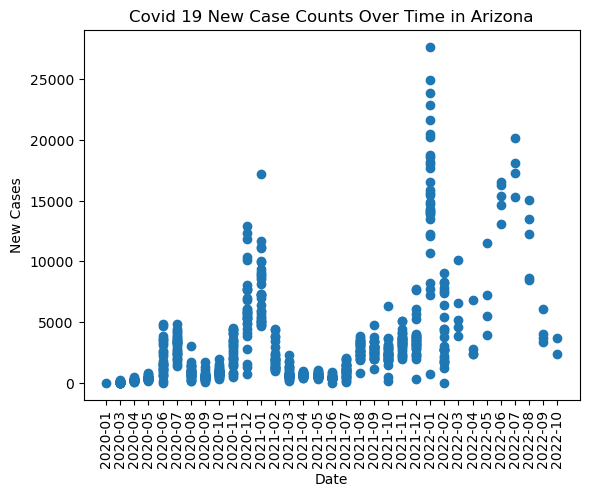

In [253]:
x_values = arizona_drop['yyyy-mm']
y_values = arizona_drop['New Case']

plt.scatter(x_values,y_values)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title ('Covid 19 New Case Counts Over Time in Arizona')
plt.xticks(rotation=90)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.show()